# Project 2 - Ames Housing Data and Kaggle Challenge
Author: _Ritchie Kwan_

---



## Problem Statement

1. As certain features of a house change, how does the sale price of the house change?

2. What neighborhoods seem like they might be a good investment?

3. Does this study generalize to other cities?

## Assumptions

The study was conducted under the assumption that the features of a house, such as square footage, overall quality, and number of bedrooms, _affect the value of the home consistently_ in the city of Ames.


## Executive Summary

When asked about predictors of the value of a home, the first features to come to mind might be overall square footage, number of bedrooms, number of bathrooms, proximity to places of interest. These assumptions are made by the fact that most homebuyers will shop for a house using these metrics. This analysis shows that, in fact, the most accurate predictors of home value are generally categorical, not numerical.  The top predictors were determined by the biggest coefficients of a `Lasso` model.

### Top predictors of a house in Ames
1. `gr_liv_area` : Above ground living area in square feet
2. `overall_qual` : Overall quality rating
3. `bsmtfin_sf_1` : Finished basement area in square foot
4. `neighborhood` : Physical locations within Ames city limits
5. `total_bsmt_sf` : Total basement area square feet
6. `year_remod/add` : Year of remodel date
7. `lot_area` : Lot size in square feet
8. `year_built` : Year of original construction date
9. `gr_liv_area kitchen_qual` : Interactive feature of above ground living area and kitchen quality
10. `kitchen_qual` : Kitchen quality rating

**Above ground living area**

To no surprise, the amount of living space is a strong predictor of home value. 

**Overall / Kitchen Quality**

The features that measure quality are subject to the opinion of a credible reviewer, most likely an appraiser. The overall quality rating is scored from 1 to 10, while the other ratings are scored from Poor, Fair, Average, Good, to Excellent. What makes a kitchen excellent or poor is subject to the reviewer. Since these ratings are made by opinion and not judgment, they are considered categorical. The kitchen in particular is a major selling point. 

**Basement size**

Finished basements add a considerable amount of living space to a house.

**Neighborhood**

Location, location, location. Neighborhoods command a huge influence over the value of a home. Neighborhoods are contained with district lines, which dictate which school district a child will attend. HOAs assure the overall cleanliness of the neighborhood, which will affect the value of the individual homes. The value of a beautiful house may be brought down by shoddy homes adjacent to it.

**Lot Area**

Parking space is a highly desired statistic, especially in cities where parking can cost money. Parking space also dictates how easily guests can visit a house.

**Year built / remodeled**

The age of a home implies the quality of the home. The older a home gets, the lesser quality it becomes through natural wear and tear. The newer the home, the higher the price. Remodeling a home to give it new life can boost its value by looking like new.


### Estimating the value of categories

To be considered for regression modeling, categorical values must somehow be converted to numerical values. The sale prices were grouped by category, then by each different value. Every unique value was assigned the median sale price and then scaled down by the highest value of that category. This conversion method revealed that ranking features (such as quality) tend to have a non-linear, quadratic relationship with the sale price.  Strictly categorical features that do not imply a ranking followed a more linear relationship.

### Feature Selection

Features to be used for the predictive model were selected by measuring their correlation with the sale price. Interactive features were automatically generated using the `PolynomialFeatures` class. The coefficients of the `Lasso` model reveal the strongest predictors of sale price.

### Predictive Modeling

Predictive models were generated using the following `sklearn` classes: 
1. `LinearRegression`
2. `RidgeCV`
3. `LassoCV`


## Table of Contents
1. [EDA and Data Cleaning](#EDA-and-Data-Cleaning)
2. [Preprocessing and Feature Engineering](02-Preprocessing-and-Feature-Engineering.ipynb)
3. [Modeling Benchmarks](03-Model-Benchmarks.ipynb)  
4. [Model Tuning](04-Model-Tuning.ipynb)  
5. [Production Model and Insights](05-Production-Model-and-Insights.ipynb)    
 

### Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

%matplotlib inline

<a id="eda-and-data-cleaning"></a>
## EDA and Data Cleaning

### Load data

In [73]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

### Preview data

In [74]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [75]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

2051 rows, 81 columns

In [76]:
df_train.shape

(2051, 81)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [78]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Change columns names 
#### Lowercase and replace spaces with underscores

In [79]:
df_train.columns = [col.lower().replace(' ', '_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ', '_') for col in df_test.columns]

### Handle missing values

#### Impute missing numerical values
Set missing numerical values to random values sampled from each column's distribution. This method of imputing preserves the overall distribution of the columns.

In [80]:
def replace_na_with_sample(df):
    for col in df.select_dtypes(include = ['int', 'float']).columns: 
        # replace NaN with random value in the distribution
        # np.random.choice(train[col].dropna()) is the distribution
        distribution = df[col].dropna()
        df[col] = df[col].apply(lambda x : \
                                      np.random.choice(distribution) if np.isnan(x) \
                                      else x)
    return df


In [81]:
df_train = replace_na_with_sample(df_train)
df_test = replace_na_with_sample(df_test)

#### Set missing string values to 'NA'

In [82]:
def set_missing_string_to_na(df):
    # Replace nan with 'NA'
    df = df.apply(lambda x : x.fillna('NA') if x.dtype == 'object'
                                            else x)
    # Replace 'None' with 'NA' for consistency
    df = df.apply(lambda x : x.replace('None', 'NA') if x.dtype == 'object'
                                            else x)
    return df

In [83]:
df_train = set_missing_string_to_na(df_train)
df_test = set_missing_string_to_na(df_test)

In [84]:
df_train[df_train.isna().any(axis = 1)]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [85]:
df_test[df_test.isna().any(axis = 1)]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type


No more missing values!

In [118]:
def subplot_boxplots(df, columns, ncols = 3):
    n_columns = len(columns)
    nrows = int(np.ceil(n_columns/ncols))    # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(ncols*5, nrows*5)   # You'll want to specify your figsize
                          )
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(columns): 
        ax[i].boxplot(df[column])
        ax[i].set_title('Distribution of {}'.format(column), fontsize = 15)
        
#     delete extra axes
    if n_columns%ncols != 0:
        for i in range(0, n_columns%ncols+1):
            fig.delaxes(ax.flatten()[ncols*nrows-i])
            


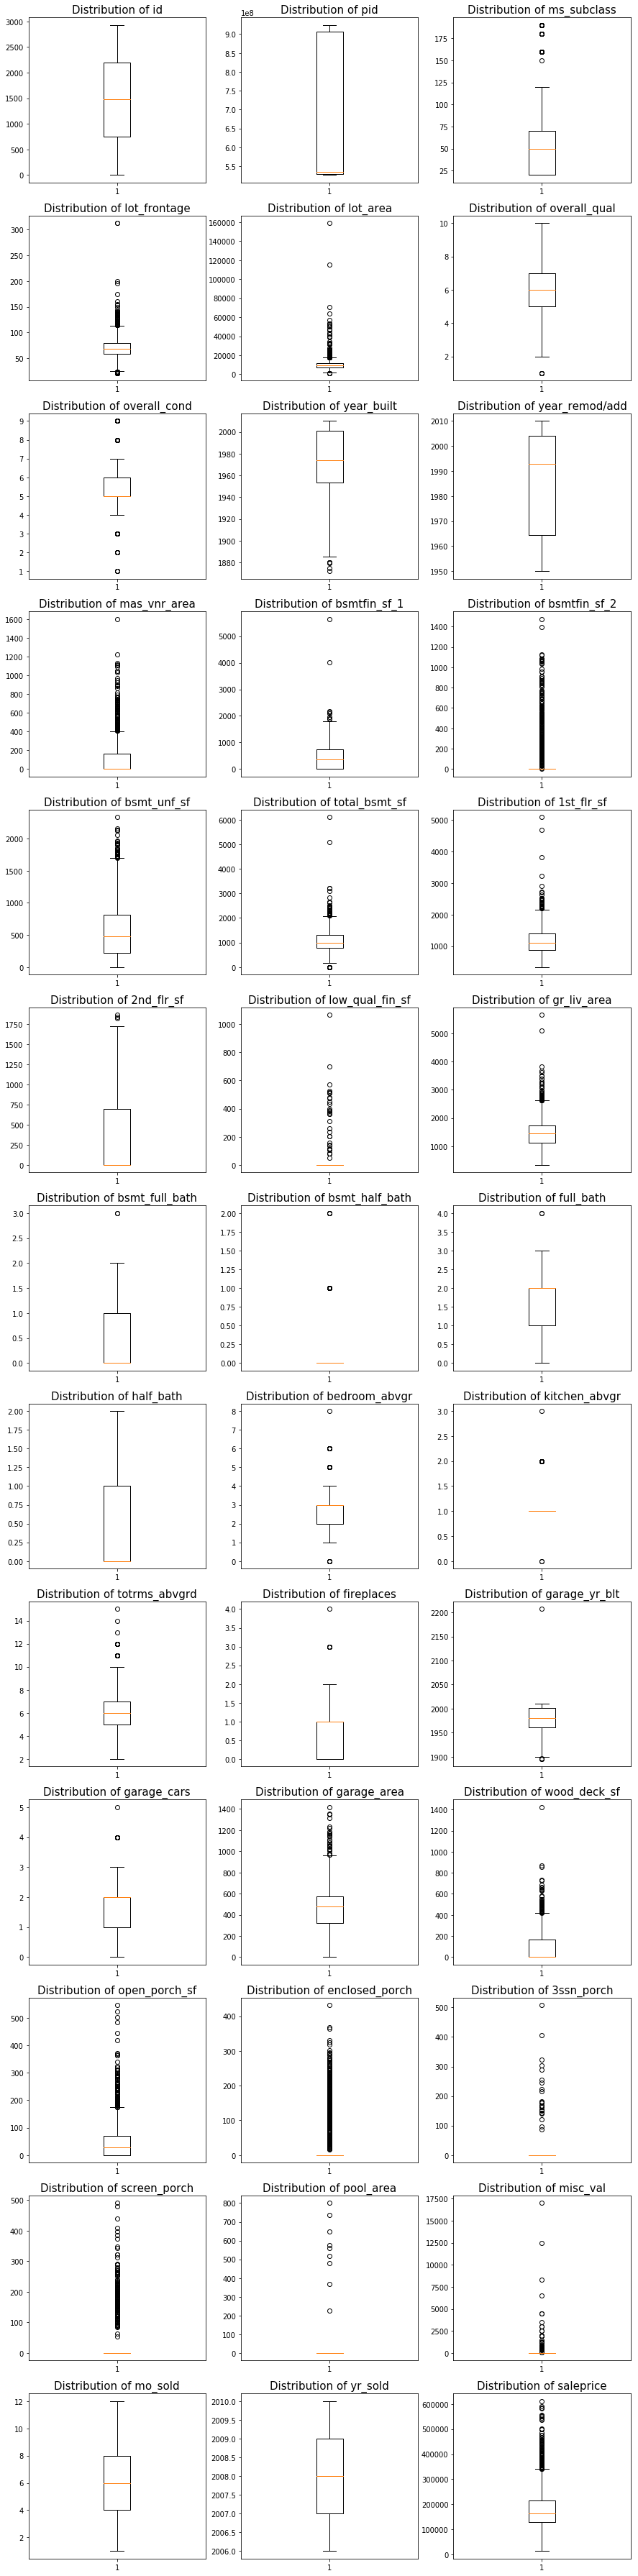

In [119]:
numerical_columns = df_train.select_dtypes(include = ['int', 'float']).columns
subplot_boxplots(df_train, numerical_columns);

### Drop outliers and invalid values
`garage_yr_blt` has a year from the future.

In [17]:
df_train['garage_yr_blt'].max()
mask = df_train['garage_yr_blt'] > 2018
df_train[mask][['id', 'garage_yr_blt']]

,id,garage_yr_blt
1699,2261,2207.0


In [18]:
df_train = df_train.drop(df_train[mask].index, axis = 0)

Remove outliers

In [19]:
mask = df_train['total_bsmt_sf'] > 4000
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [20]:
df_train = df_train.drop(df_train[mask].index, axis = 0)

In [21]:
mask = df_train['garage_cars'] > 4
df_train = df_train.drop(df_train[mask].index, axis = 0)

In [22]:
mask = df_train['lot_frontage'] > 180
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
441,1639,527226040,190,RL,195.0,41600,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,11,2007,WD,155000
1335,1266,535427070,20,RL,313.0,27650,Pave,NA,IR2,HLS,...,0,0,NA,NA,NA,0,11,2008,WD,242000
1875,2279,923202220,20,RL,200.0,43500,Pave,NA,Reg,Lvl,...,0,561,TA,GdPrv,NA,0,6,2007,WD,130000


In [23]:
df_train = df_train.drop(df_train[mask].index, axis = 0)

In [24]:
mask = df_train['lot_area'] > 80000
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,2116,906426060,50,RL,44.0,159000,Pave,NA,IR2,Low,...,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,63.0,115149,Pave,NA,IR2,Low,...,0,0,NA,NA,NA,0,6,2007,WD,302000


In [25]:
df_train = df_train.drop(df_train[mask].index, axis = 0)

In [26]:
mask = df_train['wood_deck_sf'] > 1000
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
966,2294,923229100,80,RL,48.0,15957,Pave,NA,IR1,Low,...,0,0,NA,MnPrv,NA,0,9,2007,WD,188000


In [27]:
df_train = df_train.drop(df_train[mask].index, axis = 0)

In [28]:
mask = df_train['1st_flr_sf'] > 4000
# df_train = df_train.drop(df_train[mask].index, axis = 0)
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


Other outliers were from rows that already dropped.

In [29]:
mask = df_train['gr_liv_area'] > 4000
df_train[mask]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


### Make dictionary of all categories and all possible values
Find all unique values in training and test set

In [30]:
categories = df_train.select_dtypes(include = 'object').columns

category_dict = {category : 
                 pd.concat([df_train[category], df_test[category]]).unique().tolist()
                 for category in categories}

### Define a function to multi plot median price per categorical column by values

In [31]:
def subplot_median_price(df, columns, titles = [], ncols = 3):
    n_columns = len(columns)
    nrows = int(np.ceil(n_columns/ncols))    # Makes sure you have enough rows
    
    if titles == []:
        titles = columns
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(ncols*6, nrows*5),   # You'll want to specify your figsize
                           sharey = False, sharex = False)
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(columns): 
        ax[i].plot(df.groupby(column)['saleprice'].median().sort_values())
        
        ax[i].set_title('Median Price per {}'.format(titles[i]), fontsize = 15)
        ax[i].set_xlabel(titles[i], fontsize = 12)
        ax[i].set_ylabel('Sale Price', fontsize = 12)
        
    # delete extra axes
    if n_columns%ncols != 0:
        for i in range(0, n_columns%ncols-1):
            fig.delaxes(ax[nrows*ncols-i])
    
    return fig, ax
            


In [32]:
def plot_median_price_by_category(df, category, category_name):
    plt.figure(figsize=(12,7))
    plt.title('Median price per {}'.format(category_name), fontsize = 20)
    plt.xlabel(category_name, fontsize = 18)
    plt.ylabel('Median Sale Price', fontsize = 18)
    sorted_category = df.groupby(category)['saleprice'].median().sort_values()
    plt.plot(sorted_category)
    plt.xticks(fontsize = 15)
    plt.xticks(rotation = 'vertical')
    plt.savefig('../images/median-price-{}.png'.format(category), bbox_inches='tight');
    plt.show()
    

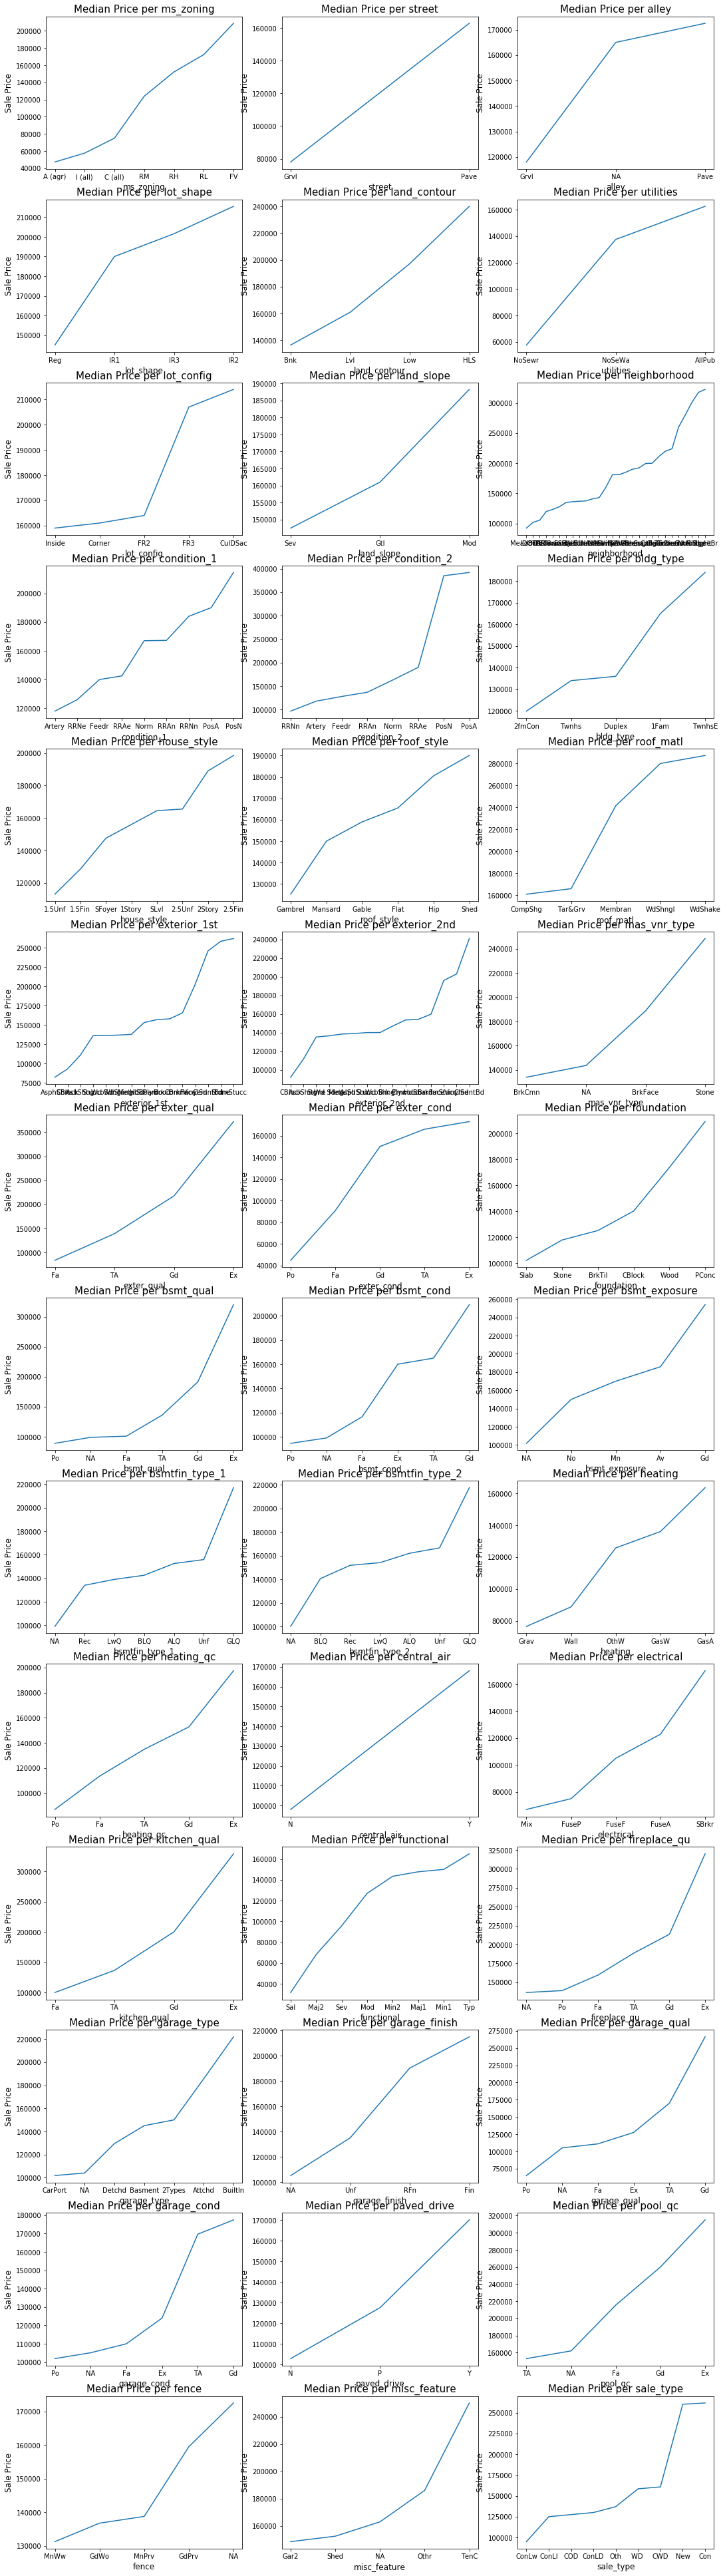

In [33]:
fig, ax = subplot_median_price(df_train, categories)
fig.savefig('../images/median-price-all-categories.png', bbox_inches='tight');

### Observe median `saleprice` grouped by Categorical values

#### Neighborhood

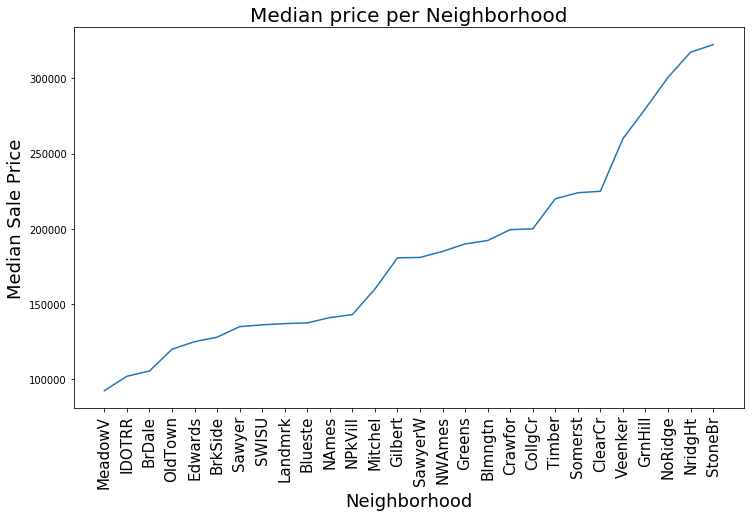

In [136]:
fig = plot_median_price_by_category(df_train, 'neighborhood', 'Neighborhood')

#### Median sale price per Neighborhood over time

In [35]:
sale_price_by_neighborhood_over_time = df_train.groupby(['neighborhood','yr_sold'])['saleprice'].median()
neighborhoods = category_dict['neighborhood']
len(neighborhoods)

28

28 Neighborhoods.

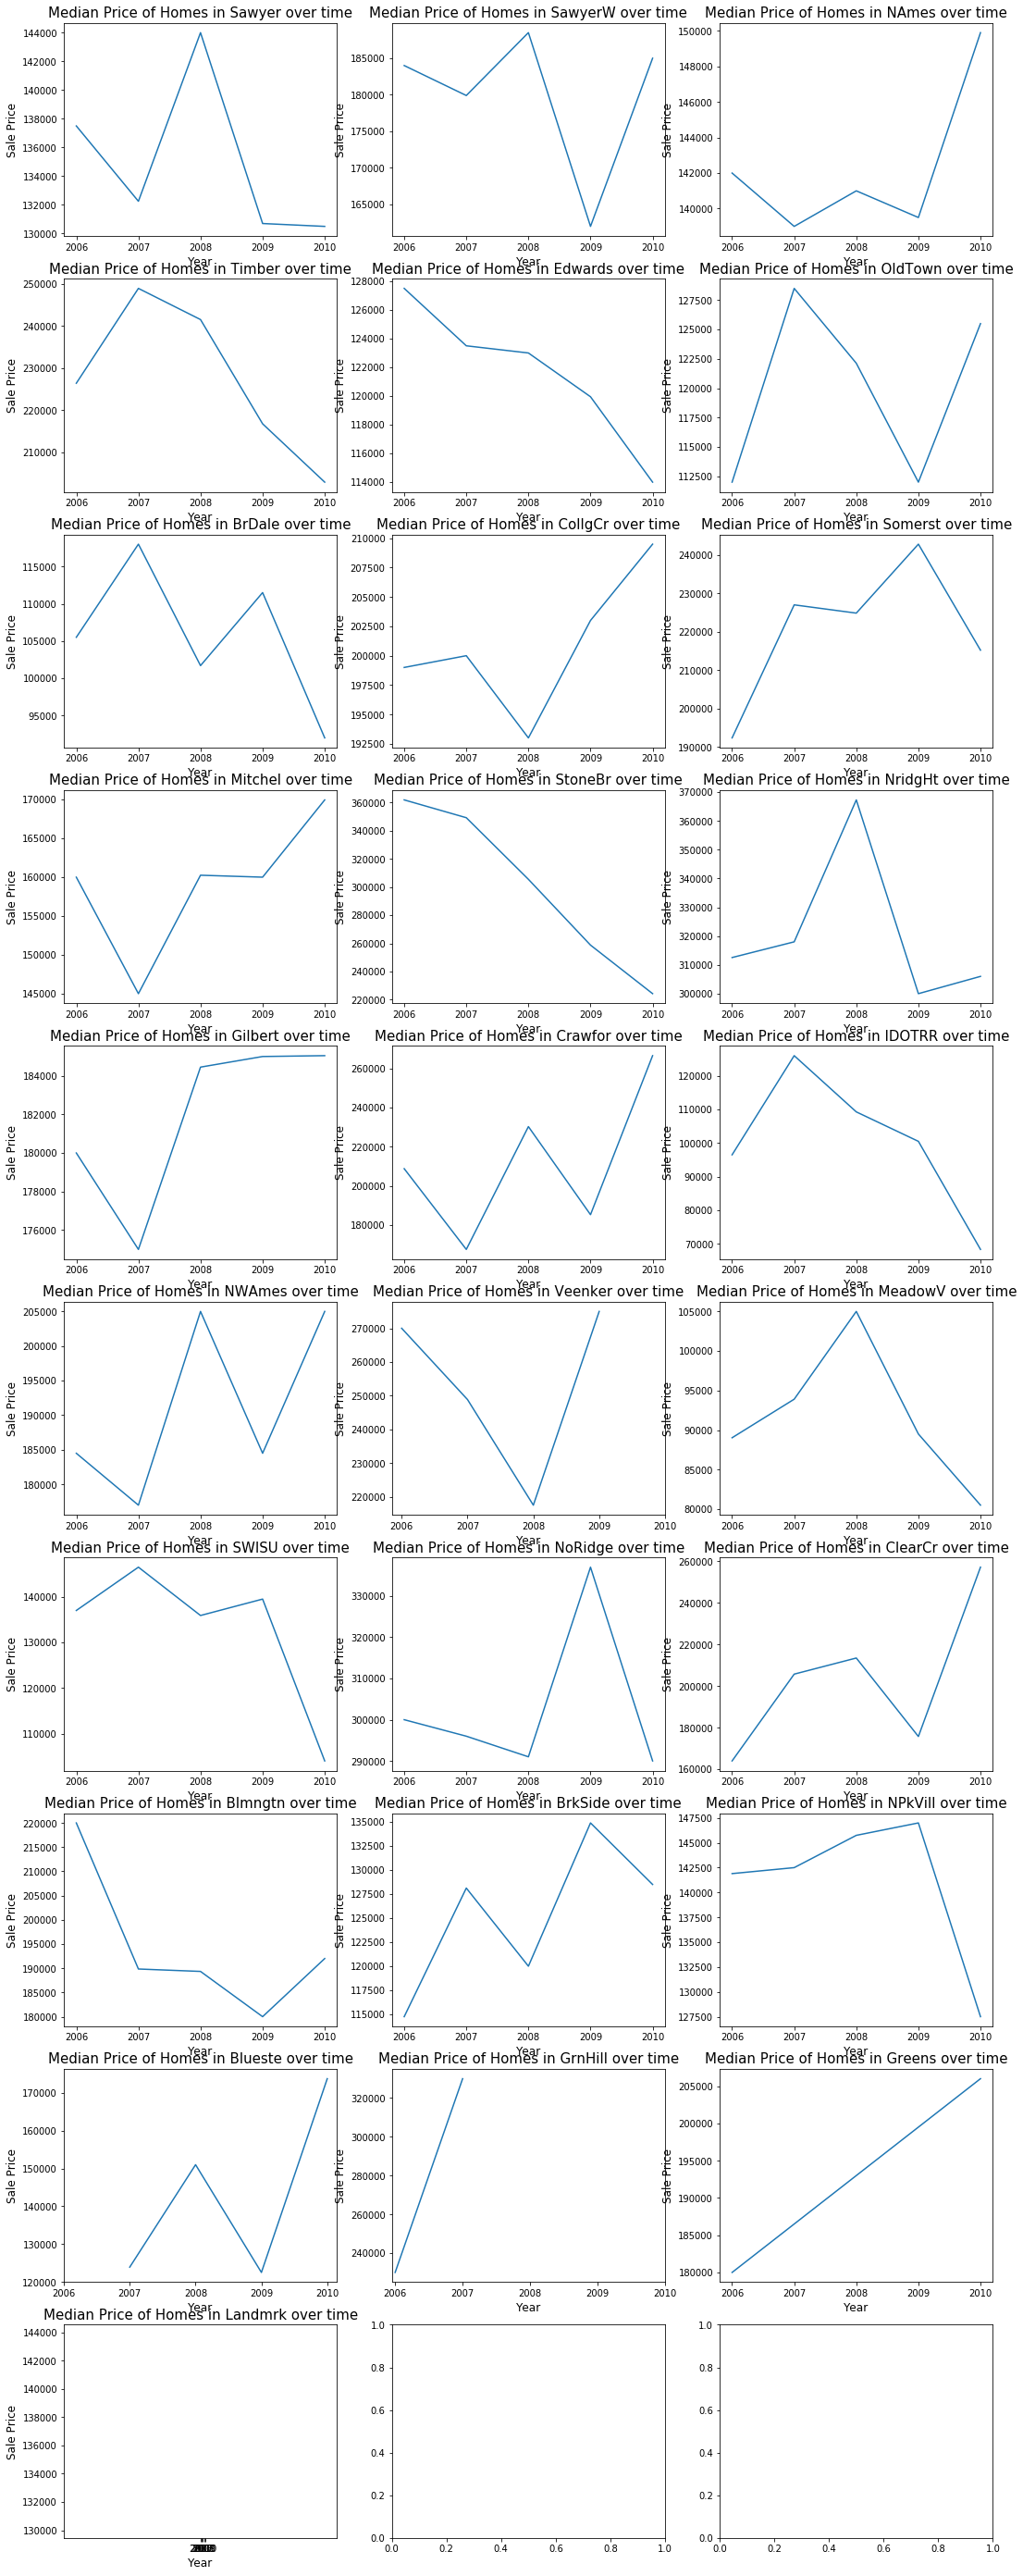

In [36]:
n_columns = len(neighborhoods)
ncols = 3
nrows = int(np.ceil(n_columns/ncols))    # Makes sure you have enough rows

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(ncols*6, nrows*5),   # You'll want to specify your figsize
                           sharey = False, sharex = False)
ax = ax.ravel()

for i, neighborhood in enumerate(neighborhoods): 
    ax[i].plot(sale_price_by_neighborhood_over_time[neighborhood])

    ax[i].set_title('Median Price of Homes in {} over time'.format(neighborhood), fontsize = 15)
    ax[i].set_xlabel('Year', fontsize = 12)
    ax[i].set_xticks(df_train['yr_sold'].unique())
    ax[i].set_ylabel('Sale Price', fontsize = 12)
    
# delete extra axes
if n_columns%ncols != 0:
    for i in range(0, n_columns%ncols-1):
        fig.delaxes(ax.flatten()[ncols*nrows-i])

fig.savefig('../images/median-price-neighborhoods-over-time.png', bbox_inches='tight');


#### Kitchen

Kitchen Quality appears to have a quadratic relationship with sale price.

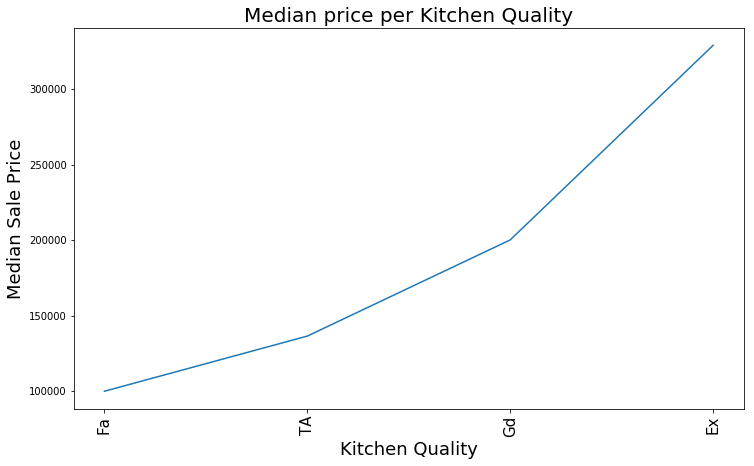

In [37]:
plot_median_price_by_category(df_train, 'kitchen_qual', 'Kitchen Quality')

#### Basement

Basement quality appears to have a quadratic relationship with sale price. Homes with poor, fair or no basement (NA) are priced similarly.

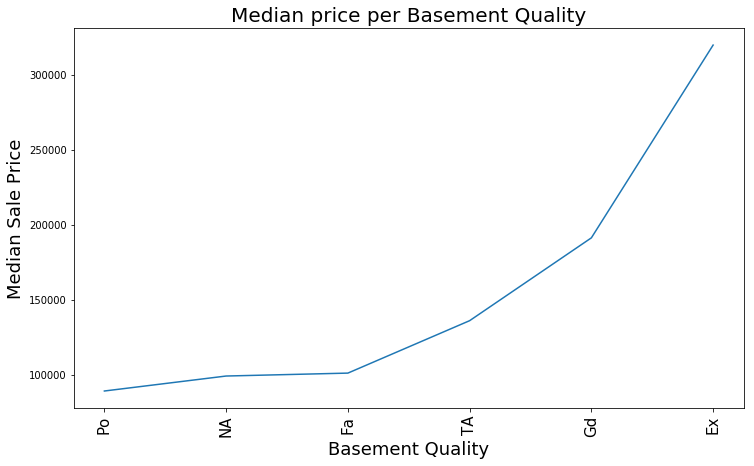

In [38]:
plot_median_price_by_category(df_train, 'bsmt_qual', 'Basement Quality')

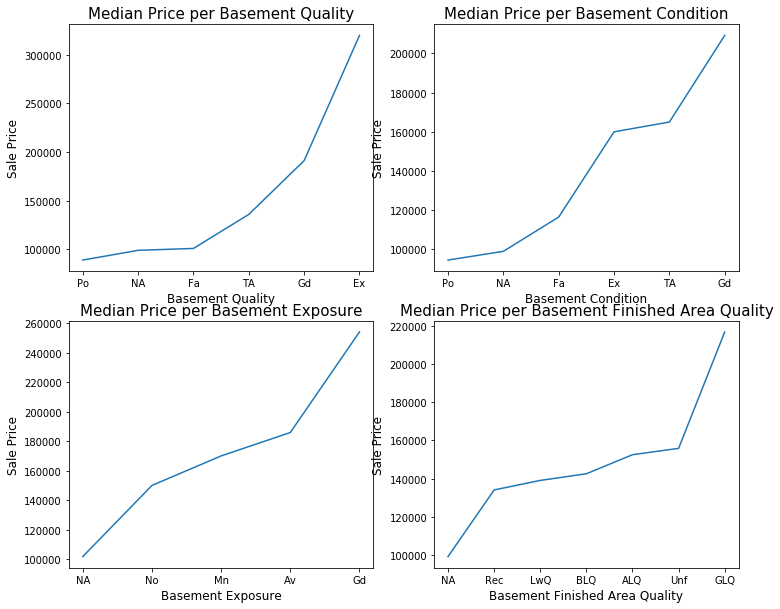

In [39]:
fig, ax = subplot_median_price(df_train, 
                     ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1'], 
                     ['Basement Quality', 'Basement Condition', 'Basement Exposure', 'Basement Finished Area Quality'], ncols = 2)
fig.savefig('../images/median-price-bsmt.png', bbox_inches='tight');

#### Garage

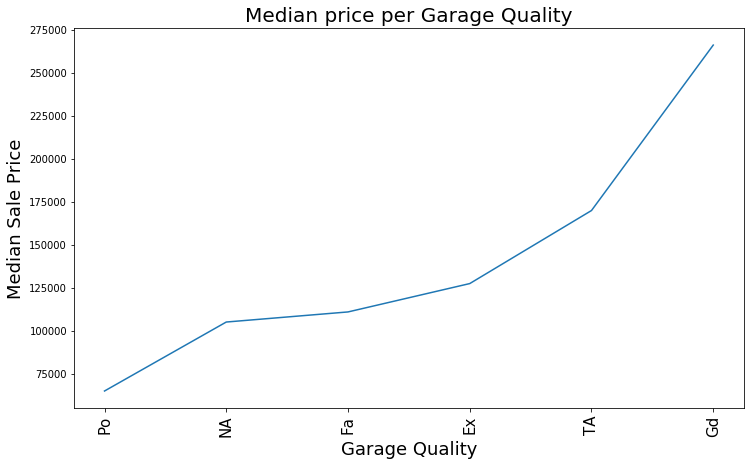

In [40]:
plot_median_price_by_category(df_train, 'garage_qual', 'Garage Quality')

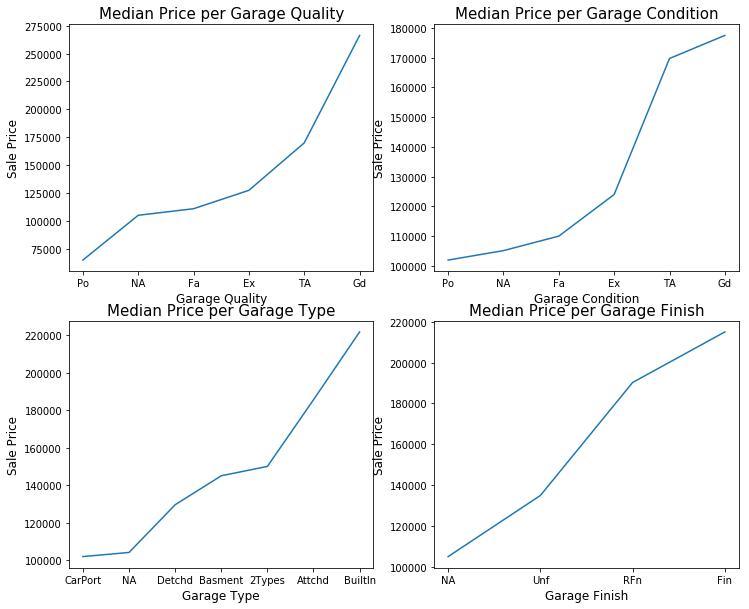

In [41]:
fig, ax = subplot_median_price(df_train, 
                     ['garage_qual', 'garage_cond', 'garage_type', 'garage_finish'], 
                     ['Garage Quality', 'Garage Condition', 'Garage Type', 'Garage Finish'], ncols=2)
fig.savefig('../images/median-price-garage.png', bbox_inches='tight');

#### External

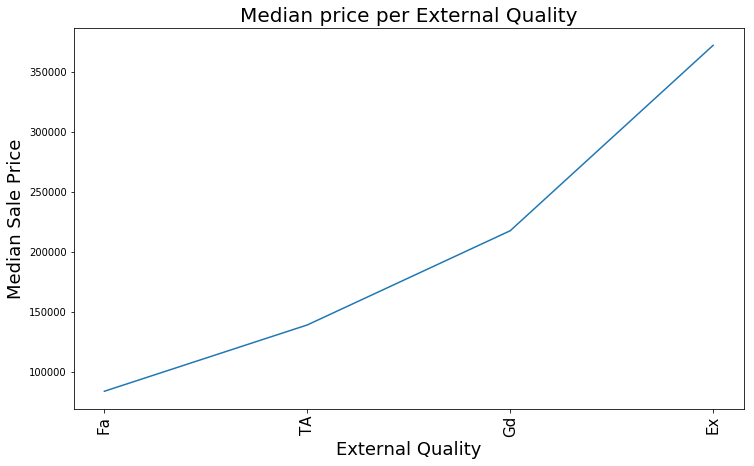

In [42]:
plot_median_price_by_category(df_train, 'exter_qual', 'External Quality')

#### Heating

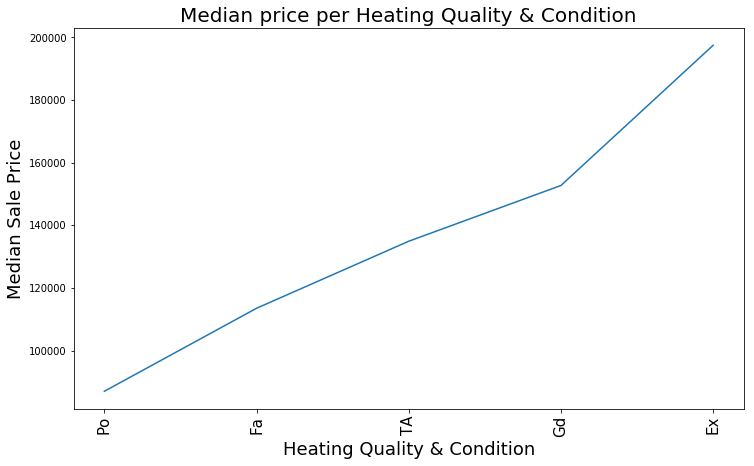

In [43]:
plot_median_price_by_category(df_train, 'heating_qc', 'Heating Quality & Condition')

#### Functionality Rating

Homes with functionality ratings of Min2 (Minor Deductions 2) or better appear to have about the same median sale price. Prices start to decrease linearly as functionality rating drops below Min2.

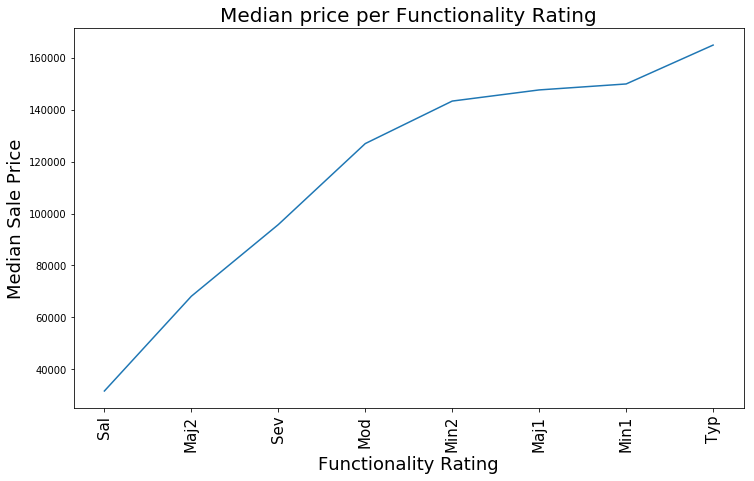

In [44]:
plot_median_price_by_category(df_train, 'functional', 'Functionality Rating')

#### MS Zoning

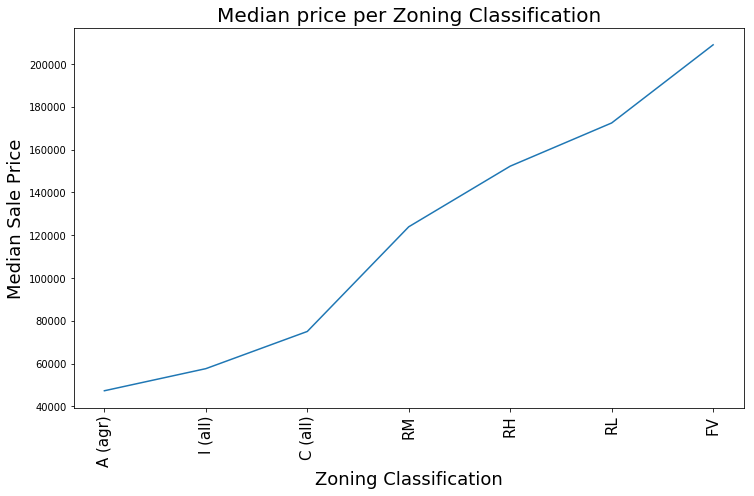

In [45]:
plot_median_price_by_category(df_train, 'ms_zoning', 'Zoning Classification')

#### Proximity to Main Road or Railroad

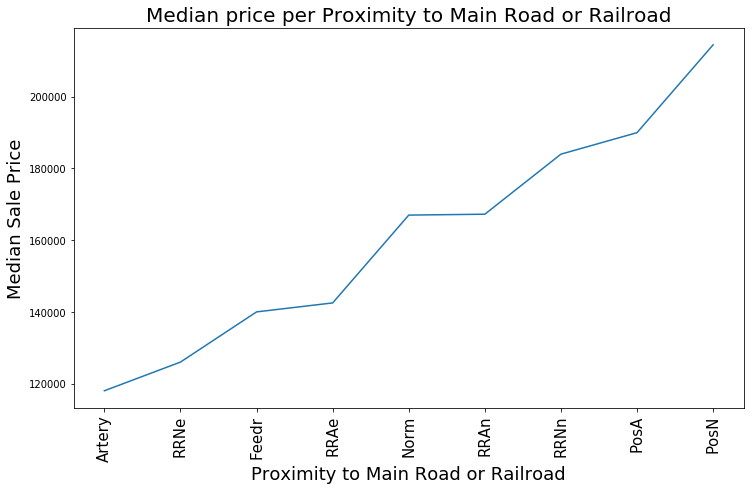

In [46]:
plot_median_price_by_category(df_train, 'condition_1', 'Proximity to Main Road or Railroad')

#### Masonry Veneer Type

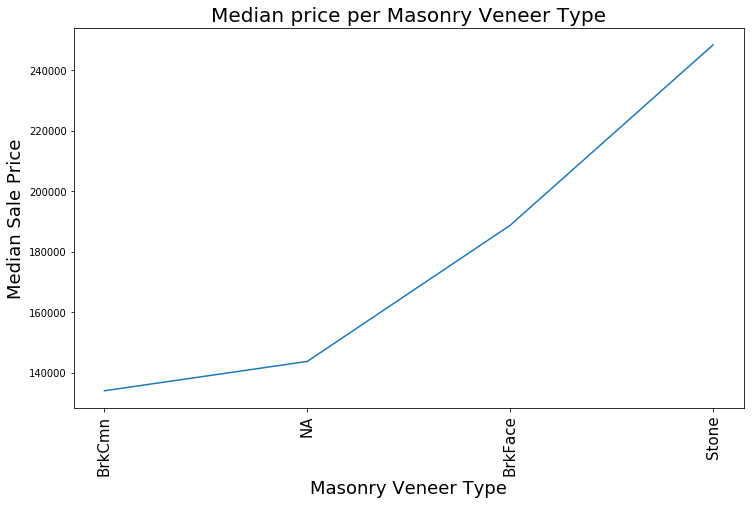

In [47]:
plot_median_price_by_category(df_train, 'mas_vnr_type', 'Masonry Veneer Type')

#### Fireplace

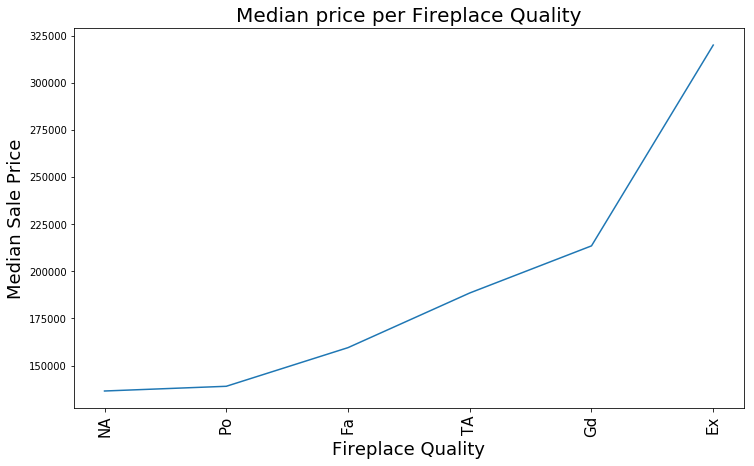

In [48]:
plot_median_price_by_category(df_train, 'fireplace_qu', 'Fireplace Quality')

#### Lot Configuration

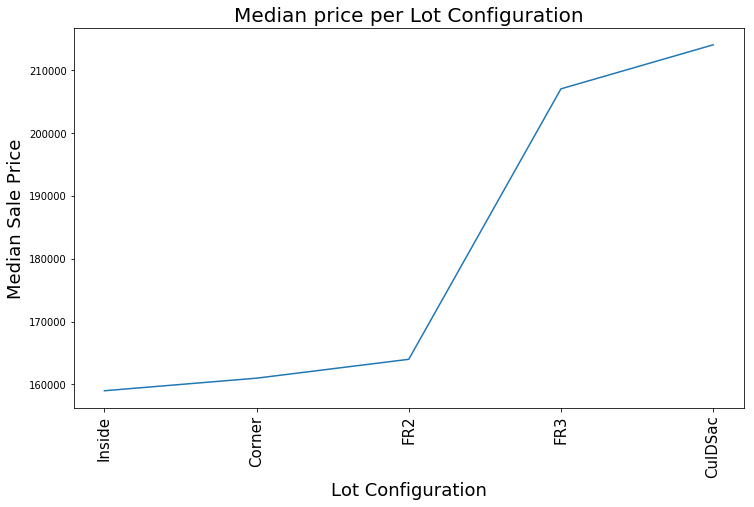

In [49]:
plot_median_price_by_category(df_train, 'lot_config', 'Lot Configuration')

#### Roof

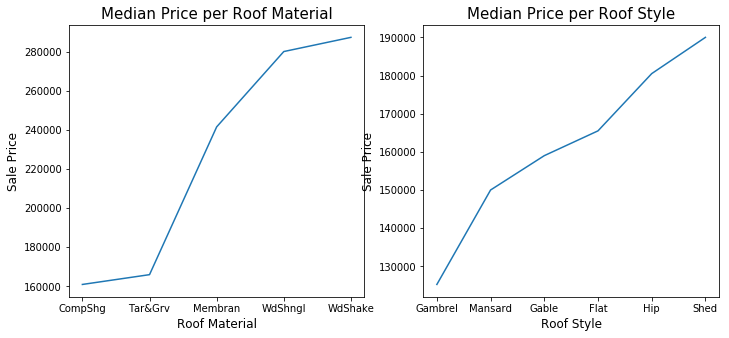

In [50]:
fig, ax = subplot_median_price(df_train, ['roof_matl', 'roof_style'], ['Roof Material', 'Roof Style'])
fig.savefig('../images/median-price-roof.png', bbox_inches='tight');

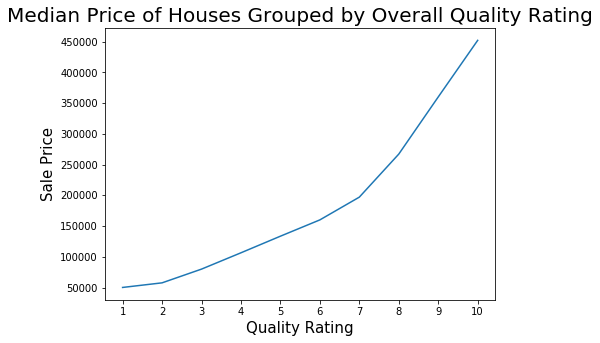

In [51]:
sale_price_by_overall_qual = df_train.groupby('overall_qual')['saleprice'].median()

plt.figure(figsize = (7, 5))
plt.title('Median Price of Houses Grouped by Overall Quality Rating', fontsize = 20)
plt.xlabel('Quality Rating', fontsize = 15)
plt.xticks(sale_price_by_overall_qual.index)
plt.ylabel('Sale Price', fontsize = 15)
plt.plot(sale_price_by_overall_qual)
plt.savefig('../images/sale-price-by-overall_qual.png', bbox_inches='tight');


#### 1st Floor Square Footage

In [52]:
df_train['sqft_bin'] = pd.cut(df_train['1st_flr_sf'], bins = 10)
houses_sold_by_sqft_bins = df_train.groupby('sqft_bin')['saleprice'].median()
houses_sold_by_sqft_bins.sort_index()

sqft_bin
(330.514, 682.6]    106500.0
(682.6, 1031.2]     139500.0
(1031.2, 1379.8]    160000.0
(1379.8, 1728.4]    215000.0
(1728.4, 2077.0]    314906.5
(2077.0, 2425.6]    350000.0
(2425.6, 2774.2]    431250.0
(2774.2, 3122.8]    287000.0
(3122.8, 3471.4]    430000.0
(3471.4, 3820.0]    284700.0
Name: saleprice, dtype: float64

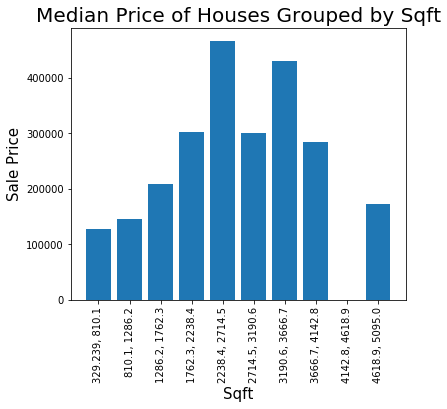

In [128]:
df_train['sqft_bin'] = pd.cut(df_train['1st_flr_sf'], bins = 10, retbins = False)
houses_sold_by_sqft = df_train.groupby('sqft_bin')['saleprice'].median()
# houses_sold_by_sqft

plt.figure(figsize = (6, 5))
plt.title('Median Price of Houses Grouped by Sqft', fontsize = 20)
plt.xlabel('Sqft', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.bar(x = houses_sold_by_sqft.index.astype(str).str.strip('()[]'), height = houses_sold_by_sqft)
plt.show()
# plt.savefig('../images/sale-price-by-sqft.png', bbox_inches='tight');

#### Above Ground Living Area

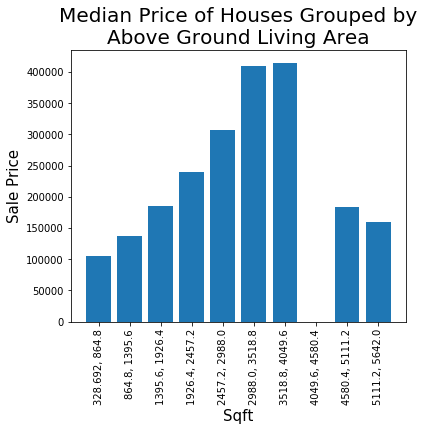

In [131]:
df_train['gr_liv_area_bin'] = pd.cut(df_train['gr_liv_area'], bins = 10, retbins = False)
houses_sold_by_gr_liv_area = df_train.groupby('gr_liv_area_bin')['saleprice'].median()


plt.figure(figsize = (6, 5))
plt.title('Median Price of Houses Grouped by\nAbove Ground Living Area', fontsize = 20)
plt.xlabel('Sqft', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.bar(houses_sold_by_gr_liv_area.index.astype(str).str.strip('()[]'), houses_sold_by_gr_liv_area)
plt.xticks(rotation = 'vertical')
plt.savefig('../images/sale-price-by-gr_liv_area.png', bbox_inches='tight');

### Summary

It appears that features regarding the quality of a home, such as overall, kitchen, basement, and kitchen, have a quadratic relationship with sale price.  This may be proven to be true when we transform the data into polynomial features.

### Build a dictionary that maps categorical values to numerical value based on the median `saleprice` of each categorical value

In [55]:
# select string type columns
categories = df_train.select_dtypes(include = 'object').columns

ranked_category_dict = {}

for category in categories:
    # list of all possible values sorted by median sale price
#     category_sorted_by_price = df_train.groupby(category)['saleprice'].mean().sort_values()
    category_sorted_by_price = df_train.groupby(category)['saleprice'].median().sort_values()
    
    # scale the value by the maximum median sale price
    category_rank = category_sorted_by_price / max(category_sorted_by_price)

    # map categorical value to numerical rank
    ranked_category_dict[category] = {cat : category_rank[cat] \
                                      for cat in category_rank.index}
    
    # map missing possible values to the median sale price
    for val in category_dict[category]:
        if val not in ranked_category_dict[category].keys():
            # not ideal solution.
            ranked_category_dict[category][val] = df_train['saleprice'].median() / max(category_sorted_by_price)
    

In [135]:
ranked_category_dict['alley']

{'Grvl': 0.6840579710144927, 'NA': 0.9565217391304348, 'Pave': 1.0}

Missing categorical values may have inaccurate predictions in unseen data. `Poor` kichen quality should be lower than `Fair`. 

In [56]:
ranked_category_dict['kitchen_qual']

{'Fa': 0.30403268959478524,
 'TA': 0.4150046212968818,
 'Gd': 0.6084940652818991,
 'Ex': 1.0,
 'Po': 0.494053120591526}

### Convert categorical features to numerical values

In [57]:
def category_to_rank(df, categories, ranked_category_dict = ranked_category_dict):   
    for category in categories:
        df[category] = df[category].map(ranked_category_dict[category])    
    
    return df

In [58]:
categories = df_train.select_dtypes(include = 'object').columns

df_train = category_to_rank(df_train, categories)
df_test = category_to_rank(df_test, categories)

In [59]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,sqft_bin,gr_liv_area_bin
0,109,533352170,60,0.825275,79.0,13517,1.0,0.956522,0.881671,0.670833,...,0.514286,1.0,0.652,0,3,2010,0.605852,130500,1,"(1379.8, 1728.4]"
1,544,531379050,60,0.825275,43.0,11492,1.0,0.956522,0.881671,0.670833,...,0.514286,1.0,0.652,0,4,2009,0.605852,220000,1,"(2077.0, 2425.6]"
2,153,535304180,20,0.825275,68.0,7922,1.0,0.956522,0.672854,0.670833,...,0.514286,1.0,0.652,0,1,2010,0.605852,109000,2,"(1031.2, 1379.8]"
3,318,916386060,60,0.825275,73.0,9802,1.0,0.956522,0.672854,0.670833,...,0.514286,1.0,0.652,0,4,2010,0.605852,174000,1,"(1379.8, 1728.4]"
4,255,906425045,50,0.825275,82.0,14235,1.0,0.956522,0.881671,0.670833,...,0.514286,1.0,0.652,0,3,2010,0.605852,138500,1,"(1379.8, 1728.4]"


In [60]:
len(df_train.dtypes[df_train.dtypes == 'object'])

0

All columns are now numerical.

### Define a function to create dummy columns
Look for missing categorical values between train and test sets

In [61]:
def get_all_dummies(df, category):
    '''
    Arguments:
    df : Housing DataFrame
    category : Categorical (string) column name
    
    Creates one hot encoded dummy columns for all 
    possible values of category.
    Checks a category dictionary to ensure all dummy 
    columns are created.
    
    Return:
    dummies : DataFrame of dummy columns
    '''    

    # no need to drop_first, we will drop after getting all columns
    cat_dummies = pd.get_dummies(df[category], 
                                 drop_first=False)
    
    # add column of zeroes if dummies is missing possible values
    for value in category_dict[category]:
        if value not in cat_dummies.columns:
            cat_dummies[value] = 0
            
    # rename dummy columns in the format 'Col_Value'
    cat_dummies = cat_dummies.rename(columns = {col : category + '_' + col\
                                                for col in cat_dummies.columns})
    # one hot encode
    cat_dummies = cat_dummies.drop(cat_dummies.columns[0], axis = 1)

    return cat_dummies


### Make Dummy Columns

Dummy columns ended up not being used. They proved to be ineffective for predicting the target. Having few possible values (0 or 1) makes it difficult to make accurate predictions. 

In [62]:
# for category in categories:
#     # make dummy columns
#     train_dummies = get_all_dummies(df_train, category)
#     df_train[train_dummies.columns] = train_dummies
    
#     # drop original categorical column
#     df_train = df_train.drop(labels = category, axis = 1)
    
    
#     test_dummies = get_all_dummies(df_test, category)
#     df_test[test_dummies.columns] = test_dummies
    
#     # drop original categorical column
#     df_test = df_test.drop(labels = category, axis = 1)

### Observe Distributions of columns

In [120]:
def subplot_histograms(df, columns, ncols = 3):
    n_columns = len(columns)
    nrows = int(np.ceil(n_columns/ncols))    # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(ncols*6, nrows*5),   # You'll want to specify your figsize
                           sharey = False, sharex = False)
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(columns): 
        ax[i].hist(df[column], bins = 25)  
        ax[i].set_title('Distribution of {}'.format(column), fontsize = 15)
        ax[i].set_ylabel("Frequency", fontsize = 15)
        
    # delete extra axes
    if n_columns%ncols != 0:
        for i in range(0, n_columns%ncols-1):
            fig.delaxes(ax.flatten()[nrows*ncols-i])
            


Only plot features that have sufficiently distinct values

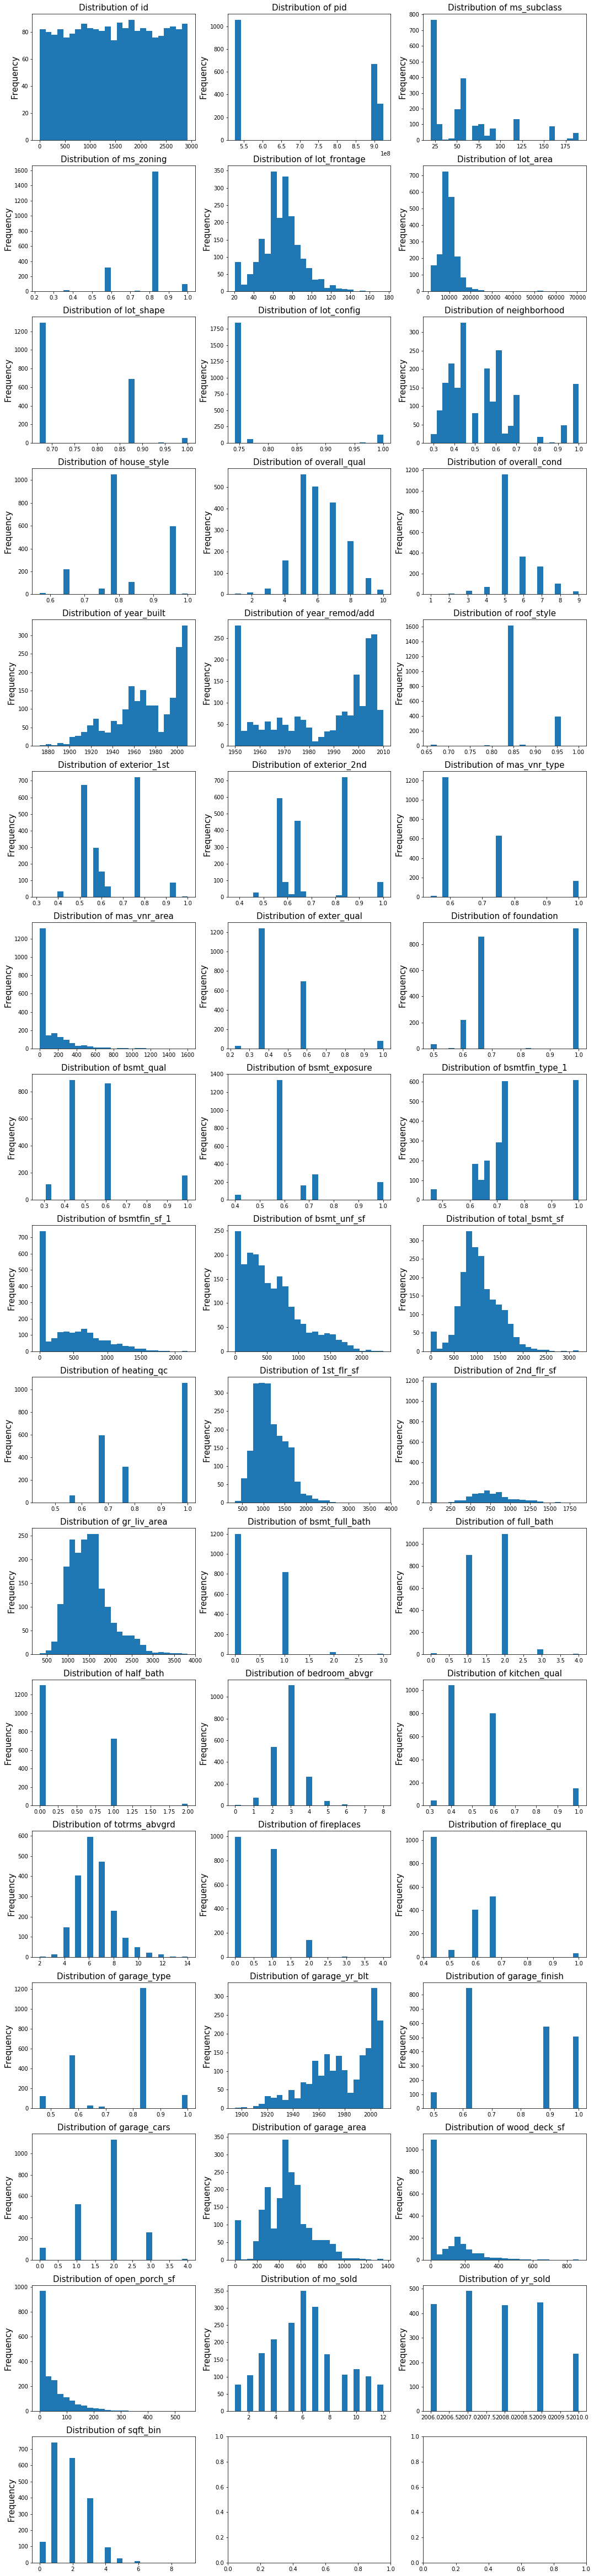

In [64]:
# select columns with numerical values
numerical_columns = df_train.select_dtypes(include = ['int', 'float']).columns
numerical_columns = [col for col in numerical_columns if col != 'saleprice']

# threshold for the percentage of the one value
too_common = 0.8

X_uncommon = df_train[[col for col in numerical_columns \
                    if df_train[col].value_counts(normalize = True).max() < too_common]]
y = df_train['saleprice']

subplot_histograms(X_uncommon, X_uncommon.columns)
    

### Define a function to plot scatterplots of features vs target

In [121]:
def subplot_scatter(X, y, ncols = 3):
    n_columns = X.shape[1]
    nrows = int(np.ceil(n_columns/ncols))    # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                           figsize=(ncols*6, nrows*5),   # You'll want to specify your figsize
                           sharey = True, sharex = False)
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(X.columns):
        ax[i].scatter(X[column], y) 
        ax[i].set_title('{} vs Sale Price'.format(column), fontsize = 15)
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("Sale Price", fontsize = 15)

    # delete extra axes
    if n_columns%ncols != 0:
        for i in range(0, n_columns%ncols-1):
            fig.delaxes(ax.flatten()[nrows*ncols-i])

### Plot each feature with respect to `saleprice`

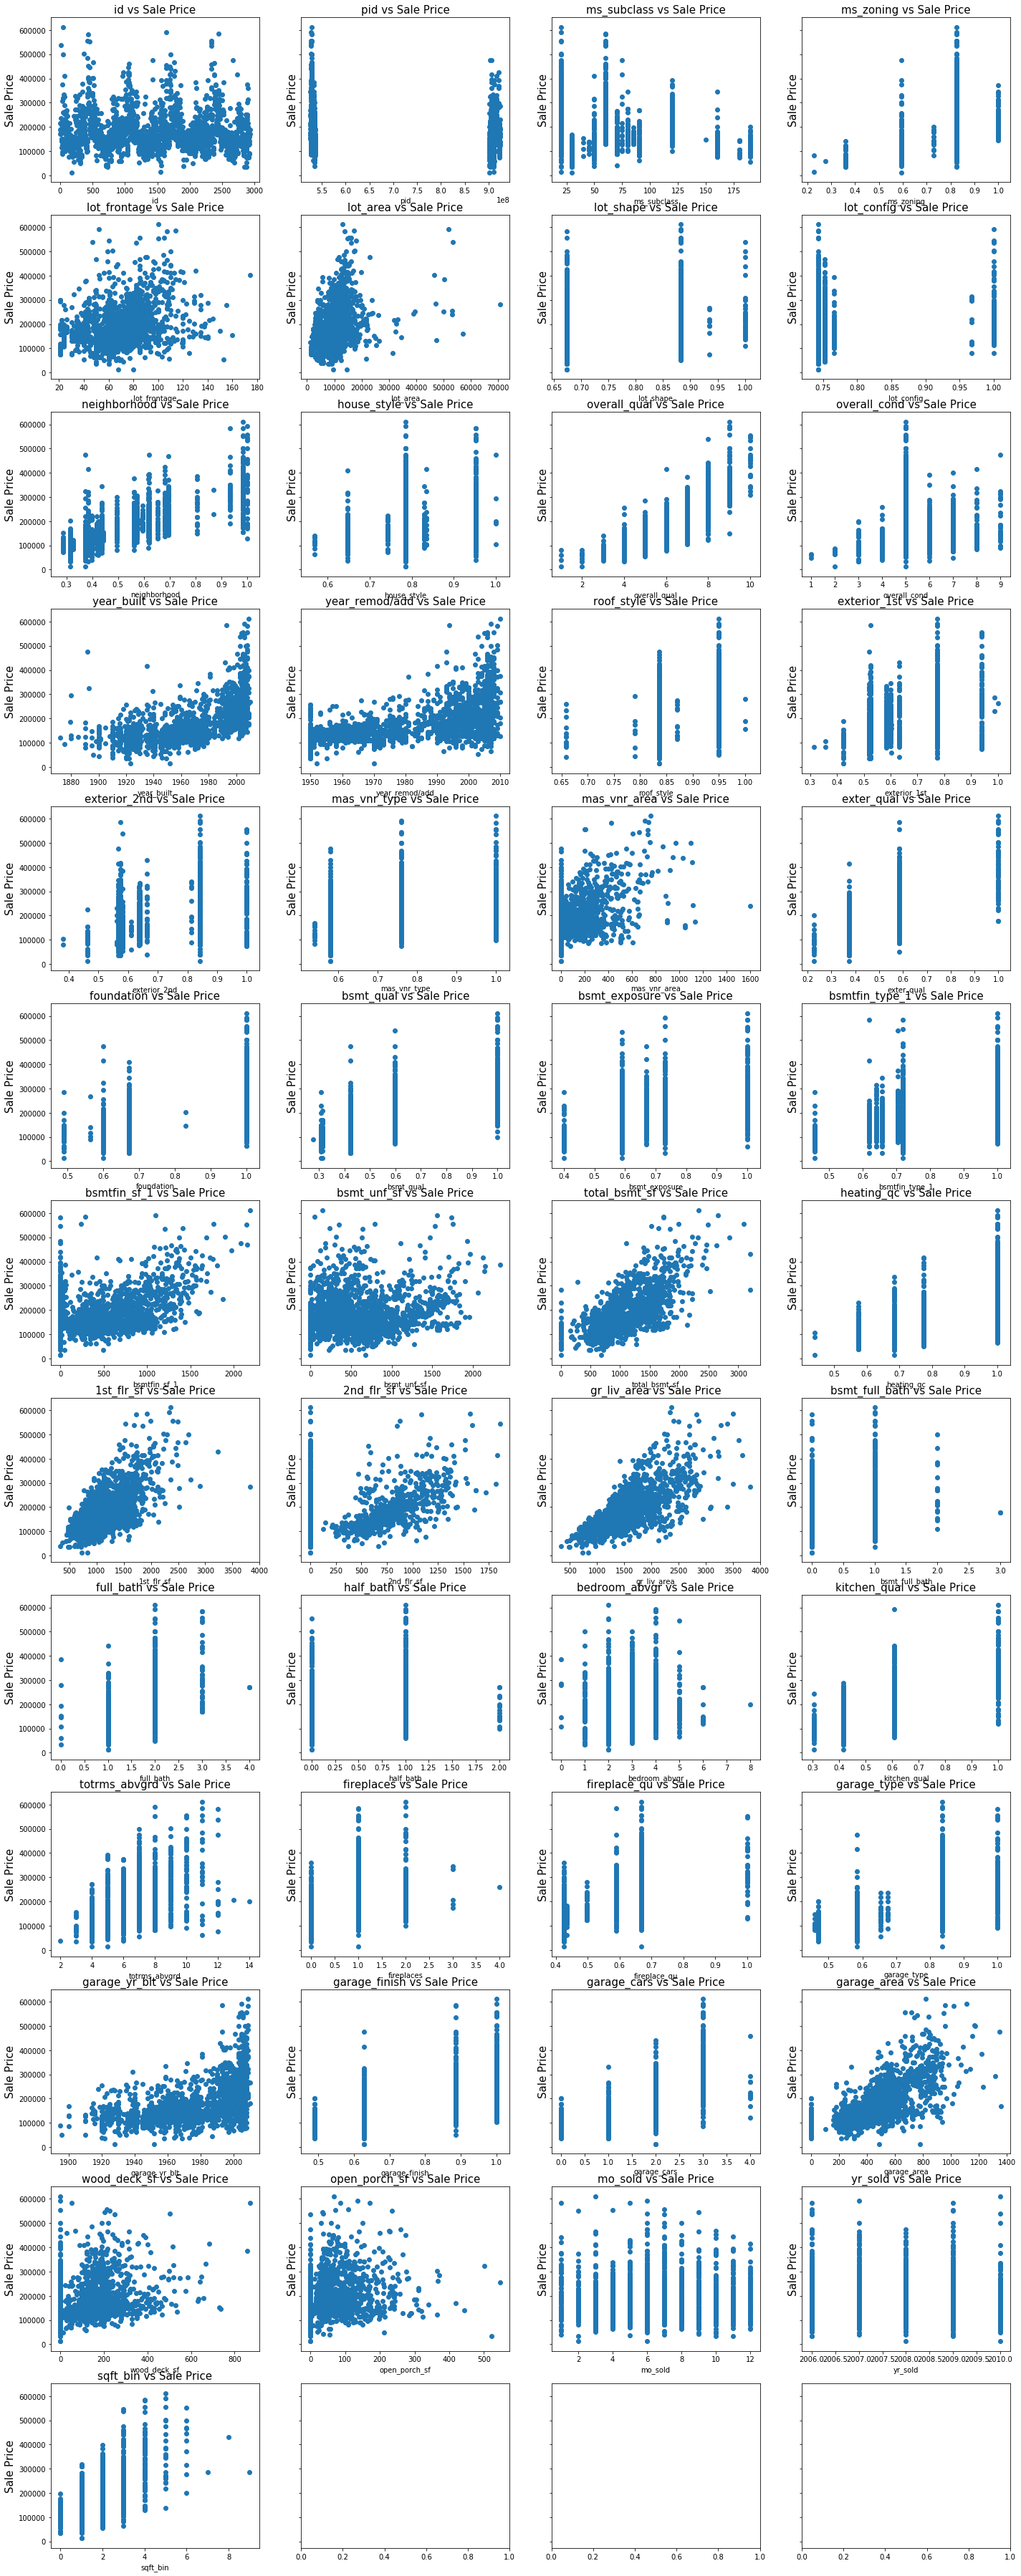

In [122]:
subplot_scatter(X_uncommon, y, 4)

#### Number of houses sold by month

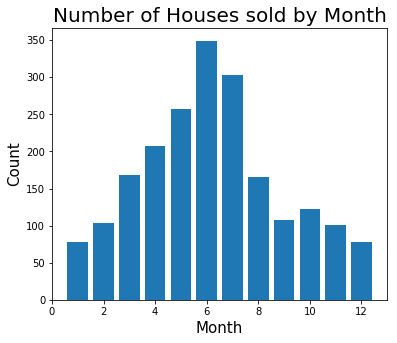

<Figure size 432x288 with 0 Axes>

In [67]:
houses_sold_by_month = df_train.groupby('mo_sold').size()

plt.figure(figsize = (6, 5))
plt.title('Number of Houses sold by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.bar(x = range(1,13), height = houses_sold_by_month)
plt.show()
plt.savefig('../images/houses-sold-by-month.png'.format(category), bbox_inches='tight');

Sell during June and July.

### Observe correlation of features with `saleprice` in samples of training set

In [70]:
# Split training set and observe features correlation with target
n = 12
kf = KFold(n_splits = n, shuffle = True, random_state = 2)
kf_iterator = kf.split(df_train, None)

df_samples_corr = pd.DataFrame()

# get correlations of each sample
for i in range(0, n):
    sample = next(kf_iterator)
    df_samples_corr[i] = df_train.iloc[sample[0]].corr()[['saleprice']].sort_values('saleprice', ascending = False)[0:10]['saleprice']
    
df_samples_corr[1:]


,0,1,2,3,4,5,6,7,8,9,10,11
overall_qual,0.801105,0.807261,0.804315,0.804488,0.806255,0.803175,0.801582,0.803659,0.803068,0.804230,0.803506,0.805437
neighborhood,0.762120,0.763243,0.760368,0.758373,0.762448,0.754785,0.754468,0.762352,0.763507,0.758753,0.758128,0.755869
exter_qual,0.725513,0.731824,0.729012,0.729766,0.738096,0.728184,0.722189,0.728832,0.732721,0.728512,0.728515,0.720684
gr_liv_area,0.723104,0.718387,0.720461,0.723553,0.723912,0.712957,0.717017,0.720789,0.711366,0.723248,0.722272,0.720902
bsmt_qual,0.715971,0.722039,0.716578,0.712745,0.722784,0.719685,0.715606,0.716823,0.723831,0.716657,0.711360,0.716804
kitchen_qual,0.711729,0.715989,0.707128,0.719603,0.712850,0.713219,0.710138,0.716952,0.709351,0.715630,0.711406,0.711983
total_bsmt_sf,0.666037,0.665757,0.669157,0.668374,0.665981,0.660328,0.652450,0.672499,0.661247,0.662666,0.665067,0.665350
garage_area,0.658899,0.659964,0.660700,0.662438,0.660098,0.658351,0.662541,0.661414,0.668191,0.662917,0.664835,0.658445
garage_cars,0.656144,0.657547,0.654005,0.657031,0.657223,0.653756,0.659641,0.656403,0.656664,0.657140,0.657255,0.652436


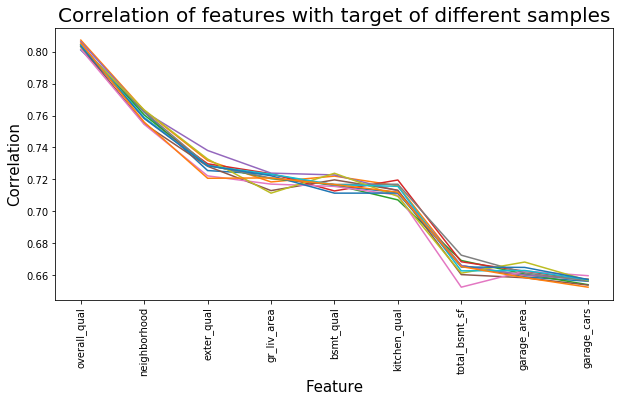

In [71]:
plt.figure(figsize = (10, 5))
plt.title('Correlation of features with target of different samples', fontsize = 20)
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Correlation', fontsize = 15)
plt.xticks(rotation = 'vertical')

plt.plot(df_samples_corr[1:])
plt.show()

The features appear to be consistently correlated with `saleprice` (besides one oddball NaN) regardless of sample size. 

### Save clean data

In [72]:
df_train.to_csv('../datasets/train_clean.csv', index = False)
df_test.to_csv('../datasets/test_clean.csv', index = False)